In [7]:
# necessary imports for code functions
from matplotlib import pyplot

from numpy import expand_dims
from numpy import zeros
from numpy import ones

from numpy.random import randn
from numpy.random import randint

from tensorflow import keras
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Input
from keras.layers import Embedding
from keras.layers import Concatenate

from keras.models import Sequential
from keras.models import load_model
from keras.models import Model

from PIL import Image
import numpy as np
import os
import pandas as pd 

# utility import
# !pip install icecream
# !pip install pyyaml h5py  # Required to save models in HDF5 format
from icecream import ic
import time


In [31]:
"""
Process:
1. convert images to black and white 
2. resize the images
3. convert them into numpy array using imread  
"""


# default values of standardised images
preferred_width = 200
preferred_height = 200

pathSource = "/data/workspace_files/igTest"
pathDest = "/data/workspace_files/BnWImages"
# list all objects in pathSource
dir_list = os.listdir(pathSource) 


# create list, to contain all standardised images; values [0:1], instead of [0:255]
images = []

# for image in pathSource, convert them to BnW, save that to pathDest, then add standardised version to images[]
for image in dir_list:
    img = Image.open(pathSource+"/"+image).convert('L').resize((preferred_width, preferred_height), Image.ANTIALIAS)
    imgArray = np.array(img) # int array of pixels
    imgArray = imgArray.astype(float)/255
    images.append(pd.DataFrame(imgArray))
    img.save(pathDest+"/BnW"+image, "JPEG")

# diagnostic checks of images[]
print(np.shape(images))
print(images[0])
print(np.shape(images[0]))

(10, 200, 200)
          0         1         2         3         4         5         6    \
0    0.462745  0.462745  0.462745  0.462745  0.462745  0.462745  0.462745   
1    0.462745  0.462745  0.462745  0.462745  0.462745  0.462745  0.462745   
2    0.466667  0.466667  0.466667  0.466667  0.466667  0.462745  0.462745   
3    0.462745  0.470588  0.470588  0.466667  0.466667  0.462745  0.462745   
4    0.462745  0.470588  0.470588  0.466667  0.466667  0.462745  0.462745   
..        ...       ...       ...       ...       ...       ...       ...   
195  0.474510  0.458824  0.454902  0.462745  0.466667  0.466667  0.470588   
196  0.478431  0.466667  0.458824  0.462745  0.466667  0.458824  0.458824   
197  0.474510  0.470588  0.462745  0.466667  0.458824  0.447059  0.447059   
198  0.466667  0.470588  0.458824  0.462745  0.474510  0.458824  0.458824   
199  0.462745  0.470588  0.462745  0.470588  0.486275  0.470588  0.474510   

          7         8         9    ...       190       191  

In [56]:
X_testing = images[0:2]
X_training = images[3:len(image)-1]

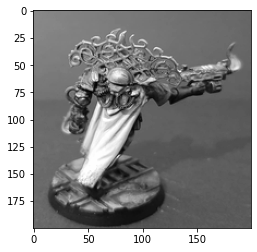

In [62]:
# image recreations
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.imshow(np.array(images[5]), cmap=cm.gray)
#np.array(images[5]) # float values